<a href="https://colab.research.google.com/github/carlosenriquez/EJERCICIO-WS-FECHAS/blob/master/DefinitivaVoteo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
union=pd.read_csv('/content/drive/MyDrive/Informacion/data_final.csv')

In [ ]:
union=union.drop(['Nombre de usuario'], axis=1)

In [ ]:
conteo=union.isnull().sum()

In [ ]:
union['Edad'].fillna(value=union['Edad'].mean(), inplace=True)
union['Numero de horas individuales de estudio'].fillna(value=union['Numero de horas individuales de estudio'].mean(), inplace=True)
union['Afabilidad'].fillna(value=union['Afabilidad'].mean(), inplace=True)
union['Apertura a culturas'].fillna(value=union['Apertura a culturas'].mean(), inplace=True)
union['Apertura a la experiencia'].fillna(value=union['Apertura a la experiencia'].mean(), inplace=True)
union['Aperutura mental'].fillna(value=union['Aperutura mental'].mean(), inplace=True)
union['Control de Emociones'].fillna(value=union['Control de Emociones'].mean(), inplace=True)
union['Control de impulsos'].fillna(value=union['Control de impulsos'].mean(), inplace=True)
union['Cooperaci—n'].fillna(value=union['Cooperaci—n'].mean(), inplace=True)
union['Cordialidad'].fillna(value=union['Cordialidad'].mean(), inplace=True)
union['Dinamismo'].fillna(value=union['Dinamismo'].mean(), inplace=True)
union['Dominancia'].fillna(value=union['Dominancia'].mean(), inplace=True)
union['Energia'].fillna(value=union['Energia'].mean(), inplace=True)
union['Escrupulosidad'].fillna(value=union['Escrupulosidad'].mean(), inplace=True)
union['Estabilidad emocional'].fillna(value=union['Estabilidad emocional'].mean(), inplace=True)
union['Persistencia'].fillna(value=union['Persistencia'].mean(), inplace=True)
union['Responsabilidad'].fillna(value=union['Responsabilidad'].mean(), inplace=True)

union['Edad'].fillna(value=union['Edad'].mean(), inplace=True)
union['Numero de horas individuales de estudio'].fillna(value=union['Numero de horas individuales de estudio'].mean(), inplace=True)



Análisis visual

In [ ]:
union.loc[union['Promedio'] >7, 'Promedio'] = 'REA'

In [ ]:
#union.loc[union['Promedio'] < 7, 'Promedio'] = 'No aprobado'

union.loc[union['Promedio'] != "REA", 'Promedio'] = 'No REA'


In [ ]:
union = union.drop(union[union['Edad']==1].index)

In [ ]:
from sklearn.preprocessing import LabelEncoder
#
# Instantiate LabelEncoder
#
le = LabelEncoder()
#
# Encode single column status
#
union.Promedio = le.fit_transform(union.Promedio)
#
# Print df.head for checking the transformation
#


Información visual

In [ ]:
list(le.inverse_transform([0,1]))

['No REA', 'REA']

In [ ]:
agrupa=pd.DataFrame()

In [ ]:
promedio=[0, 1]
agrupa['Promedio']=promedio
agrupa['Energia']=union.groupby(by='Promedio')['Energia'].mean()
agrupa['Afabilidad']=union.groupby(by='Promedio')['Afabilidad'].mean()
agrupa['Responsabilidad']=union.groupby(by='Promedio')['Responsabilidad'].mean()
agrupa['Estab. Emocional']=union.groupby(by='Promedio')['Estabilidad emocional'].mean()
agrupa['Apert. mental']=union.groupby(by='Promedio')['Aperutura mental'].mean()
agrupa.T

,0,1
Promedio,0.000000,1.000000
Energia,74.643537,73.505238
Afabilidad,75.085034,75.619762
Responsabilidad,78.160317,80.396111
Estab. Emocional,67.539683,67.938889
Apert. mental,80.967120,81.918492


Rasgos de personalidad: el modelo de cinco factores
En psicología, identificar la estructura y los tipos de personalidad humana ha sido un objetivo fundamental. Los investigadores han estudiado exhaustivamente los rasgos de personalidad conocidos y han analizado una gran variedad de medidas de tales rasgos (en autoinforme y datos de cuestionarios y medidas objetivas de entornos experimentales, con el fin de encontrar factores de personalidad subyacentes.

Apertura (OPE): de cauteloso/consistente a curioso/inventivo. este factor
Refleja la tendencia de una persona a la curiosidad intelectual, la creatividad y la preferencia por novedad y variedad de experiencias. Una puntuación alta de apertura implica una fuerte Grados de imaginación, interés artístico, emocionalidad, aventurero, intelecto y el liberalismo.

Escrupulosidad (COS): de descuidado/tranquilo a organizado/eficiente. Este
 factor refleja la tendencia de una persona a mostrar autodisciplina y aspirar a objetivos personales logros y tener una organización  (no espontánea) y confiable comportamiento. Una puntuación alta de escrupulosidad implica altos grados de autoeficacia, orden, deber, esfuerzo por lograr logros y cauteloso.

Extraversión (EXT): de solitario/reservado a extrovertido/enérgico. este factor
refleja la tendencia de una persona a buscar estimulación en compañía de otros
mostrar rasgos de sociabilidad y asertividad—, y poner energía en
encontrar emociones positivas, como felicidad, satisfacción y excitación. Un alto grado de extraversión implica fuertes grados de amistad, sociabilidad,
nivel de actividad, búsqueda de emociones y alegría.

Amabilidad (AGR): de frío/cruel a amigable/compasivo. este factor refleja la tendencia de una persona a ser amable, preocupada, veraz y cooperativa hacia otros. Una puntuación alta de amabilidad implica altos grados de moralidad,
altruismo, simpatía, modestia, confianza, cooperación y conciliación.

Neuroticismo (NEU): desde seguro/calmado hasta inseguro/nervioso. Este factor refleja la tendencia de una persona a experimentar emociones desagradables, como la ira, la ansiedad, la depresión y la vulnerabilidad, y se refiere al grado de estabilidad emocional y control de impulsos. Una puntuación alta en neuroticismo implica niveles elevados de hostilidad, ansiedad social, depresión, desmesura, vulnerabilidad e impulsividad.


Energia.

In [ ]:
agrupa3=pd.DataFrame()
promedio=[0, 1]
agrupa3['Promedio']=promedio
agrupa3['Sexo']=union.groupby(by='Promedio')['Genero'].size()
agrupa3.T

,0,1
Promedio,0,1
Sexo,35,100


In [ ]:
Y=union.iloc[:,-1:]
X=union.iloc[:,0:-1]

Ganancia de información

La ganancia de información calcula la reducción de la entropía de la transformación de un conjunto de datos. Puede utilizarse para la selección de características evaluando la ganancia de información de cada variable en el contexto de la variable objetivo.

Relief

In [ ]:
pip install skrebate

  Preparing metadata (setup.py) ... done
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29253 sha256=77a38f6543656104279fc1cad0e6d2afb4c669de29e84d040d126839e9283abf
  Stored in directory: /root/.cache/pip/wheels/dd/67/40/683074a684607162bd0e34dcf7ccdfcab5861c3b2a83286f3a
Successfully built skrebate


In [ ]:
import pandas as pd
import numpy as np
from skrebate import ReliefF
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
y = union.pop('Promedio').values
X_raw = union.values

In [ ]:
X_raw

array([[76., 34., 37., ...,  3.,  1.,  2.],
       [73., 37., 41., ...,  3.,  1.,  3.],
       [78., 40., 38., ...,  3.,  1.,  3.],
       ...,
       [73., 42., 51., ...,  4.,  1.,  3.],
       [89., 40., 49., ...,  4.,  0.,  3.],
       [73., 36., 38., ...,  4.,  1.,  3.]])

In [ ]:
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y,
                                                       random_state=4, test_size=0.3)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)

feature_names = union.columns
X_train.shape, X_test.shape

((94, 44), (41, 44))

In [ ]:
reliefFS = ReliefF(n_features_to_select=44, n_neighbors=100, n_jobs = -1)

In [ ]:
reliefFS.fit(X_train,y_train)

ReliefF(n_features_to_select=44, n_jobs=-1)

In [ ]:
relief_scores = reliefFS.feature_importances_

In [ ]:
reliefFS.transform(X_train).shape

(94, 44)

In [ ]:
i_scores = mutual_info_classif(X_train,y_train)
i_scores

array([0.08518252, 0.        , 0.        , 0.        , 0.        ,
       0.01946462, 0.04266777, 0.04352503, 0.02203885, 0.        ,
       0.00724765, 0.04657184, 0.        , 0.02427362, 0.        ,
       0.02283282, 0.        , 0.02048052, 0.04204119, 0.        ,
       0.        , 0.        , 0.04164305, 0.        , 0.02168765,
       0.        , 0.        , 0.        , 0.0568346 , 0.02014923,
       0.02095115, 0.        , 0.        , 0.03762011, 0.09904935,
       0.04082654, 0.        , 0.        , 0.01426481, 0.        ,
       0.        , 0.02852199, 0.0180067 , 0.        ])

In [ ]:
from scipy import stats
stats.spearmanr(relief_scores, i_scores)

SignificanceResult(statistic=-0.027193974792002102, pvalue=0.860903823003016)

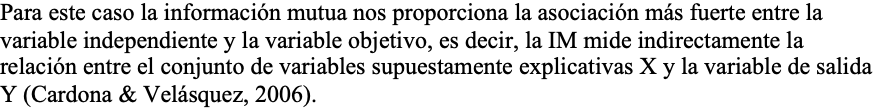

In [ ]:

df=pd.DataFrame({'Mutual Info.':i_scores,'ReliefF':relief_scores,'Feature':feature_names})
df.set_index('Feature', inplace = True)
df.sort_values('Mutual Info.', inplace = True, ascending = False)
df

,Mutual Info.,ReliefF
Feature,,
Promedio general de educacion primaria,0.099049,0.077947
Afabilidad,0.085183,-0.017126
Frecuencia con que realizas tareas de programacion de computadoras,0.056835,-0.000913
Escrupulosidad,0.046572,-0.009000
Cordialidad,0.043525,-0.023877
Cooperaci—n,0.042668,0.000494
Disfrutas de tu clase de programacion de computadoras,0.042041,0.015769
Estudias para tus evaluaciones de programacion de computadoras,0.041643,0.003788
Promedio general de Educacion Secundaria,0.040827,-0.002316


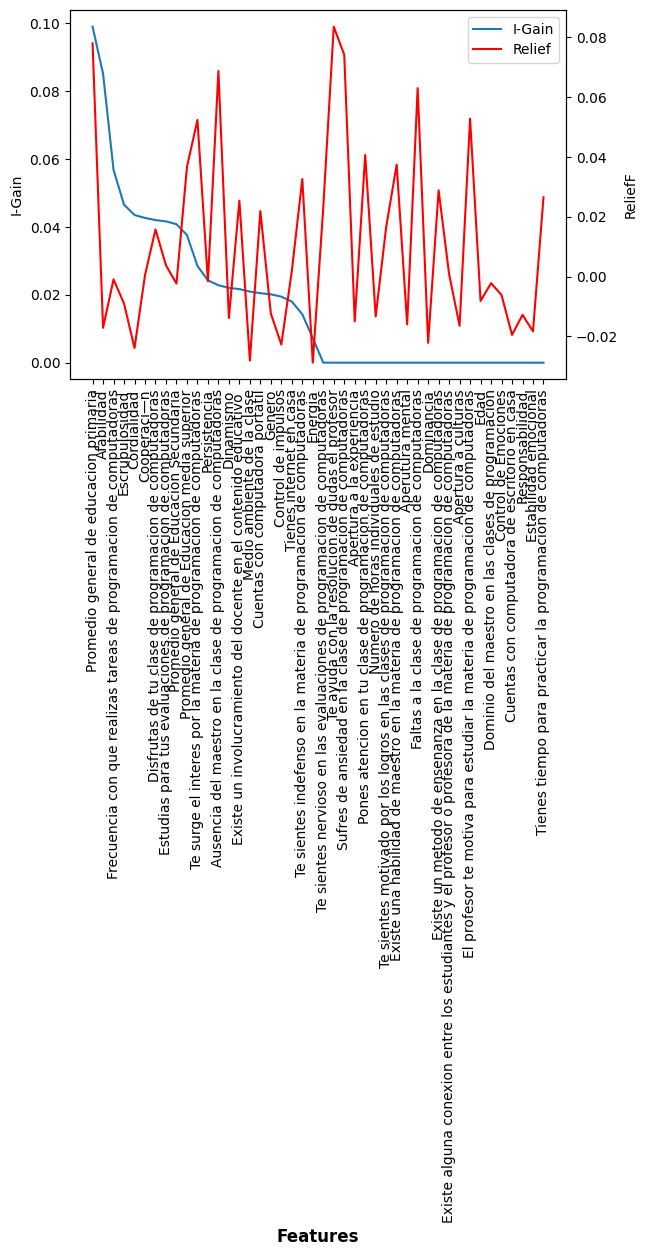

In [ ]:
fig, ax = plt.subplots()
rr = range(0,len(feature_names))
ax2 = ax.twinx()
ax.plot(df.index, df["Mutual Info."], label='I-Gain')
ax2.plot(df.index, df["ReliefF"], color='red', label='Relief')
ax.set_xticks(rr)

ax.set_xticklabels(list(df.index), rotation = 90)
ax.set_xlabel('Features', fontsize=12, fontweight='bold')
ax.set_ylabel('I-Gain')
ax2.set_ylabel('ReliefF')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc_all = accuracy_score(y_pred,y_test)
acc_all

0.6585365853658537

In [ ]:
n_features = X_train.shape[1]
n_features

44

In [ ]:
X_tr_relief = reliefFS.transform(X_train)
X_ts_relief = reliefFS.transform(X_test)
X_tr_relief.shape

(94, 44)

In [ ]:
kNN_relief = model.fit(X_tr_relief,y_train)
y_pred = kNN_relief.predict(X_ts_relief)
acc_11 = accuracy_score(y_pred,y_test)
acc_11

0.6585365853658537

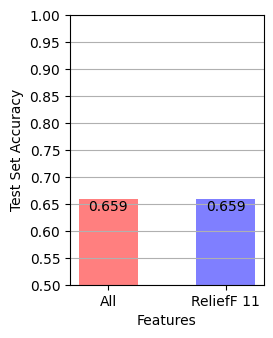

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig, ax = plt.subplots(figsize=(2.5,3.5))
width = 0.5
sb = 'skyblue'

options = ['All', 'ReliefF 11']
scores = [acc_all,acc_11]

y_pos = np.arange(len(options))

p1 = ax.bar(y_pos, scores, width, align='center',
            color=['red', 'blue'],alpha=0.5)

ax.set_ylim([0.5, 1])
plt.grid(axis = 'y')
plt.yticks(np.arange(0.5,1.05,0.05))
ax.text(0,acc_all, '%0.3f' % acc_all, ha='center', va = 'top')
ax.text(1,acc_11, '%0.3f' % acc_11, ha='center',va = 'top')

plt.xticks(y_pos, options)
plt.ylabel('Test Set Accuracy')
plt.xlabel('Features')
plt.show()

In [ ]:
data_query = df[(df['Mutual Info.'] > 0)]
conteo=data_query.shape[0]
data_query2=data_query[(data_query['ReliefF'])>0]
X=pd.DataFrame()
X['Promedio general de Educacion media superior']=union['Promedio general de Educacion media superior']
X['Edad']=union['Edad']
X['Estabilidad emocional']=union['Estabilidad emocional']
X['Promedio general de educacion primaria']=union['Promedio general de educacion primaria']
X['Apertura mental']=union['Aperutura mental']
X['Te ayuda con la resolucion de dudas el profesor']=union['Te ayuda con la resolucion de dudas el profesor']
X['Persistencia']=union['Persistencia']
X['Genero']=union['Genero']
X['Ausencia del maestro en la clase de programacion de computadoras']=union['Ausencia del maestro en la clase de programacion de computadoras']
X['Cuentas con computadora portatil']=union['Cuentas con computadora portatil']
X['Existe un metodo de ensenanza en la clase de programacion de computadoras']=union['Existe un metodo de ensenanza en la clase de programacion de computadoras']
X['Te sientes nervioso en las evaluaciones de programacion de computadoras']=union['Te sientes nervioso en las evaluaciones de programacion de computadoras']
X['Numero de horas individuales de estudio']=union['Numero de horas individuales de estudio']
X['Energia']=union['Energia']
X['El profesor te motiva para estudiar la materia de programacion de computadoras']=union['El profesor te motiva para estudiar la materia de programacion de computadoras']
X['Faltas a la clase de programacion de computadoras']=union['Faltas a la clase de programacion de computadoras']
#for i in range(conteo):
     # X[feature_names[i]]=union[feature_names[i]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)


In [ ]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (94, 16)
Number transactions y_train dataset:  (94,)
Number transactions X_test dataset:  (41, 16)
Number transactions y_test dataset:  (41,)


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [ ]:
y_train_res

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=None, shuffle=False)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [50,100,150,250],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': [10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}

clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 10, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_res,y_train_res)
clf_performance(best_clf_rf,'Random Forest')

Fitting 10 folds for each of 96 candidates, totalling 960 fits
Random Forest
Best Score: 0.8609890109890111
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 250}


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [50,100,150],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [15, 20, 25],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 10, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train_res,y_train_res)
clf_performance(best_clf_xgb,'XGB')

Fitting 10 folds for each of 729 candidates, totalling 7290 fits
XGB
Best Score: 0.8032967032967033
Best Parameters: {'colsample_bytree': 0.85, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 15, 'min_child_weight': 0.01, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 2, 'sampling_method': 'uniform', 'subsample': 0.6}


In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
clf_svc = SVC(kernel='rbf', C=1e9, gamma=1e-07, probability=True)

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']
              }

clf_svc = GridSearchCV(clf_svc, param_grid = param_grid, cv = 10, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_res,y_train_res)
clf_performance(best_clf_svc,'SVC')

Fitting 10 folds for each of 25 candidates, totalling 250 fits
SVC
Best Score: 0.8554945054945055
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


Mejores estimadores, para los modelos.

<Axes: >

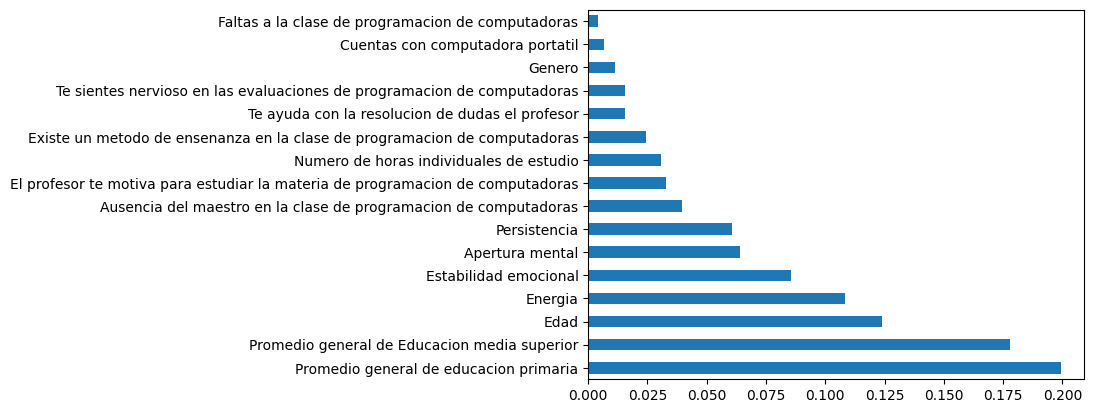

In [ ]:
best_rf = best_clf_rf.best_estimator_.fit(X_train_res,y_train_res)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train_res.columns)
feat_importances.nlargest(20).plot(kind='barh')

<Axes: >

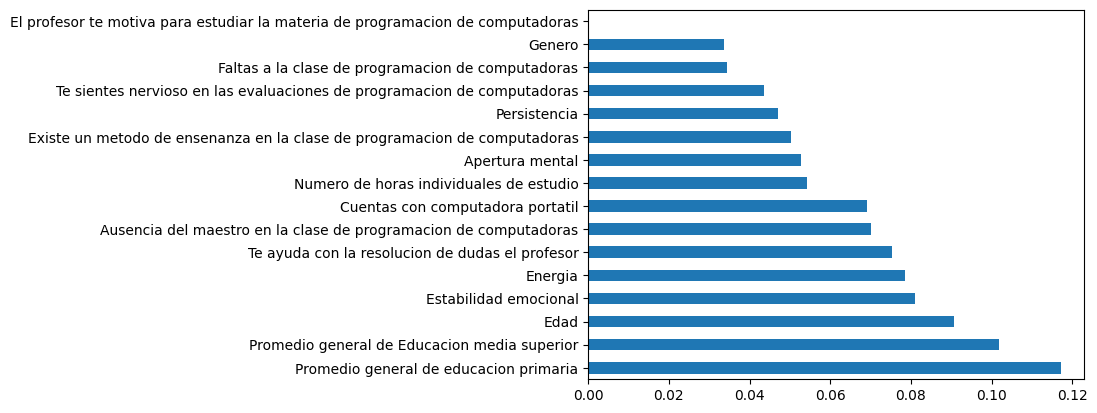

In [ ]:
best_xgb = best_clf_xgb.best_estimator_.fit(X_train_res,y_train_res)
feat_importances = pd.Series(best_xgb.feature_importances_, index=X_train_res.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_
best_svc = best_clf_svc.best_estimator_


voting_clf_hard = VotingClassifier(estimators = [('rf',best_rf),('xgb',best_xgb),('svc',best_svc)], voting = 'hard')

weight_rf = 0.5
weight_xgb = 0.3
weight_gbC = 0.2


voting_clf_soft = VotingClassifier(estimators = [('rf',best_rf),('xgb',best_xgb),('svc',best_svc)], voting = 'soft', weights=[weight_rf, weight_xgb, weight_gbC])

print('voting_clf_hard :',cross_val_score(voting_clf_hard,X_train,y_train,cv=10))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,X_train,y_train,cv=10).mean())

print('voting_clf_soft :',cross_val_score(voting_clf_soft,X_train,y_train,cv=10))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,X_train,y_train,cv=10).mean())


voting_clf_hard : [0.6        0.7        0.7        0.5        0.88888889 0.66666667
 0.66666667 0.77777778 0.66666667 0.44444444]
voting_clf_hard mean : 0.6611111111111112
voting_clf_soft : [0.7        0.7        0.7        0.4        1.         0.66666667
 0.66666667 0.88888889 0.66666667 0.44444444]
voting_clf_soft mean : 0.6722222222222223


In [ ]:
#Make Predictions
voting_clf_hard.fit(X_train_res, y_train_res)
voting_clf_soft.fit(X_train_res, y_train_res)
#voting_clf_all.fit(X_train_res, y_train_res)
#voting_clf_xgb.fit(X_train_res, y_train_res)

y_hat_vc_hard = voting_clf_hard.predict(X_test).astype(int)
y_hat_vc_soft =  voting_clf_soft.predict(X_test).astype(int)


In [ ]:
#convert output to dataframe
final_data_2 = { 'Survived': y_hat_vc_hard}
submission_2 = pd.DataFrame(data=final_data_2)

final_data_3 = { 'Survived': y_hat_vc_soft}
submission_3 = pd.DataFrame(data=final_data_3)

final_data_comp = {'Survived_vc_hard': y_hat_vc_hard, 'Survived_vc_soft' : y_hat_vc_soft}
comparison = pd.DataFrame(data=final_data_comp)

In [ ]:
from sklearn.metrics import confusion_matrix

accuracy = accuracy_score(y_test, y_hat_vc_hard)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7317073170731707


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat_vc_soft)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7317073170731707


In [ ]:
rf.fit(X_train_res, y_train_res)
predicrf=rf.predict(X_test)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predicrf)


ValueError: ignored

In [ ]:
xgb.fit(X_train_res, y_train_res)
predicxgb=xgb.predict(X_test)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predicxgb)
print(f'Accuracy: {accuracy}')

ValueError: ignored

In [ ]:
df=pd.DataFrame(X_train_res)

In [ ]:
df["Rendimiento"]=y_train_res

In [ ]:
tododatos=pd.DataFrame()

In [ ]:
intervaloEdad, _=pd.cut(df['Edad'], bins=10,retbins=True)

tododatos['IEdad']=intervaloEdad


In [ ]:


import pandas as pd

dimensiones = ['Promedio general de Educacion media superior',
               'Promedio general de educacion primaria',
               'Numero de horas individuales de estudio',
               'Estabilidad emocional',
               'Apertura mental',
               'Persistencia',
               'Energia']


percentiles = [0.1, 0.3, 0.5, 0.7, 0.9]  # Cambia estos valores según lo que necesites

for dim in dimensiones:
    dimension_percentiles = df[dim].quantile(q=percentiles, interpolation='linear')
    ranges = []
    for value in df[dim]:
        if value <= dimension_percentiles.iloc[0]:
            concate=dim+'=MuyBajo'
            ranges.append(concate)
        elif value <= dimension_percentiles.iloc[1]:
            concate=dim+'=Bajo'
            ranges.append(concate)
        elif value <= dimension_percentiles.iloc[2]:
            concate=dim+'=Promedio'
            ranges.append(concate)
        elif value <= dimension_percentiles.iloc[3]:
            concate=dim+'=Alto'
            ranges.append(concate)
        else:
            concate=dim+'=MuyBajo'
            ranges.append(concate)

    tododatos[f'{dim}_Rango'] = ranges






In [ ]:


dimensiones = ['Te ayuda con la resolucion de dudas el profesor',
               'Ausencia del maestro en la clase de programacion de computadoras',
               'Existe un metodo de ensenanza en la clase de programacion de computadoras',
               'Te sientes nervioso en las evaluaciones de programacion de computadoras',
               'El profesor te motiva para estudiar la materia de programacion de computadoras',
               'Faltas a la clase de programacion de computadoras']


for dim in dimensiones:

    ranges = []
    for value in df[dim]:
        if value == 1:
            concate=dim+'=Nunca'
            ranges.append(concate)
        elif value == 2:
            concate=dim+'=Raramente'
            ranges.append(concate)
        elif value == 3:
            concate=dim+'=Ocasionalmente'
            ranges.append(concate)
        elif value == 4:
            concate=dim+'=Frecuentemente'
            ranges.append(concate)
        else:
            concate=dim+'=Muy Frecuentemente'
            ranges.append(concate)

    tododatos[f'{dim}_Rango'] = ranges

In [ ]:
dimensiones = ['Genero']


for dim in dimensiones:

    ranges = []
    for value in df[dim]:
        if value == 0:
            concate=dim+'=Mujer'
            ranges.append(concate)
        else:
            concate=dim+'=Hombre'
            ranges.append(concate)


    tododatos[f'{dim}_Rango'] = ranges

In [ ]:
dimensiones = ['Cuentas con computadora portatil']


for dim in dimensiones:

    ranges = []
    for value in df[dim]:
        if value == 1:
            concate=dim+'=Si'
            ranges.append(concate)
        else:
            concate=dim+'=No'
            ranges.append(concate)


    tododatos[f'{dim}_Rango'] = ranges

In [ ]:
dimensiones = ['Rendimiento']

for dim in dimensiones:

    ranges = []
    for value in df[dim]:
        if value == 0:
            concate=dim+'=Aprobado'
            ranges.append(concate)
        else:
            concate=dim+'=Noaprobado'
            ranges.append(concate)


    tododatos[f'{dim}_Rango'] = ranges

In [ ]:
records=[]
for i in range(0, tododatos.shape[0]):
  records.append([str(tododatos.values[i,j]) for j in range(tododatos.shape[1])])

In [ ]:
support=0.2
confidence=0.3
lift=0.0

In [ ]:
!pip install apyori
from apyori import apriori

rules = apriori(records, min_support= support, min_confidence=confidence, min_lift=lift, use_colnames=True)
results=list(rules)
print(f'Se encontraron {len(results)} reglas.')
results_frame= pd.DataFrame(results)



  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=412420b7e7409f2e5406406dc50d35ea65e8e8ca2a0715f80d723a736d7a3b3a
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori
Se encontraron 208 reglas.


In [ ]:
results_frame.head(len(results_frame)-1)

,items,support,ordered_statistics
0,"((16.983, 18.7])",0.382353,"[((), ((16.983, 18.7]), 0.38235294117647056, 1..."
1,"((18.7, 20.4])",0.463235,"[((), ((18.7, 20.4]), 0.4632352941176471, 1.0)]"
2,(Apertura mental=MuyBajo),0.419118,"[((), (Apertura mental=MuyBajo), 0.41911764705..."
3,(Ausencia del maestro en la clase de programac...,0.382353,"[((), (Ausencia del maestro en la clase de pro..."
4,(Ausencia del maestro en la clase de programac...,0.485294,"[((), (Ausencia del maestro en la clase de pro..."
...,...,...,...
202,"(Genero=Hombre, Promedio general de educacion ...",0.213235,"[((Genero=Hombre), (Rendimiento=Noaprobado, Pr..."
203,"((18.7, 20.4], Faltas a la clase de programaci...",0.227941,"[(((18.7, 20.4]), (Faltas a la clase de progra..."
204,"(Genero=Hombre, Faltas a la clase de programac...",0.205882,[((Ausencia del maestro en la clase de program...
205,"(Genero=Hombre, Existe un metodo de ensenanza ...",0.242647,"[((Cuentas con computadora portatil=Si), (Gene..."
